In [2]:
import torch

import torch.nn as nn
from PIL import Image

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Local에서 실습 하시는 분은 실행 x
%cd /content/LGES2023_CNN/

In [22]:
# !pip install torchsummary
from torchsummary import summary

#### Layer종류 & Block화
torch document : https://pytorch.org/docs/stable/nn.html


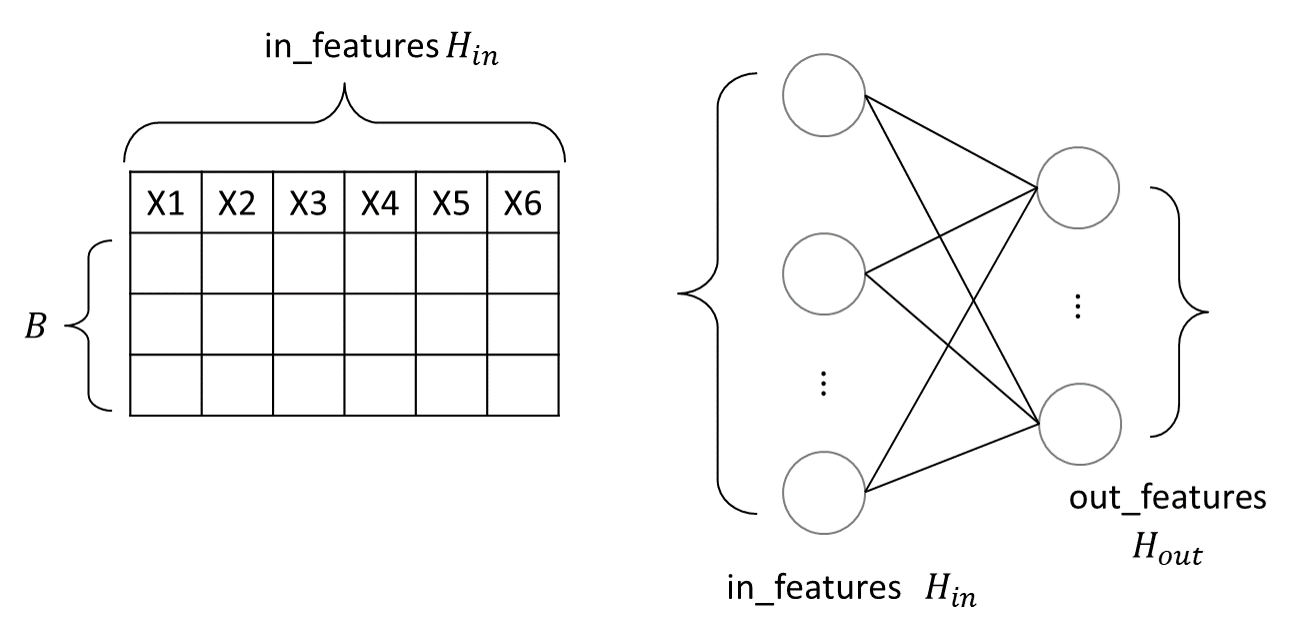

In [5]:
# linear layer
Image.open('./images/img1.png')

In [3]:
x = torch.randn(32,10) # B,H_in
linear_layer = nn.Linear(in_features=10, out_features=1)
print(linear_layer(x).shape) # B, H_out

torch.Size([32, 1])


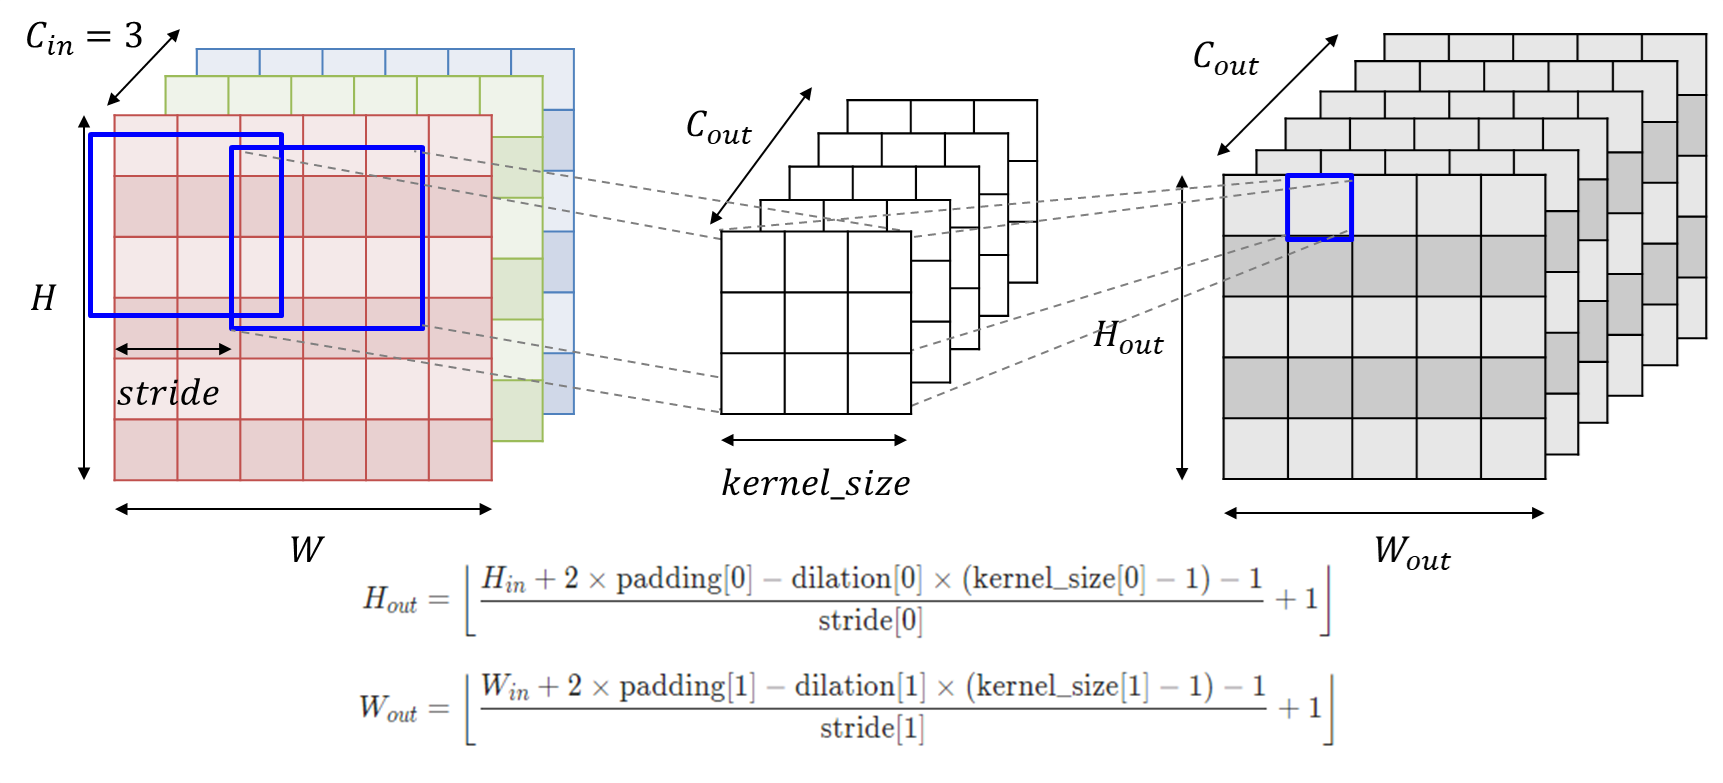

In [7]:
# convolution layer
Image.open('./images/img2.png')

In [4]:
# convolution layer
imgs = torch.randn(32,3,64,64) # B, C_in, H, W
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(2,2), stride=(2,2))
print(conv_layer(imgs).shape) # B, C_out, H_out, W_out

torch.Size([32, 16, 32, 32])


In [5]:
# activation functions
x = torch.FloatTensor([[-1,1]])
relu = nn.ReLU(inplace=True)
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
print(x.shape, x, relu(x))

torch.Size([1, 2]) tensor([[-1.,  1.]]) tensor([[0., 1.]])


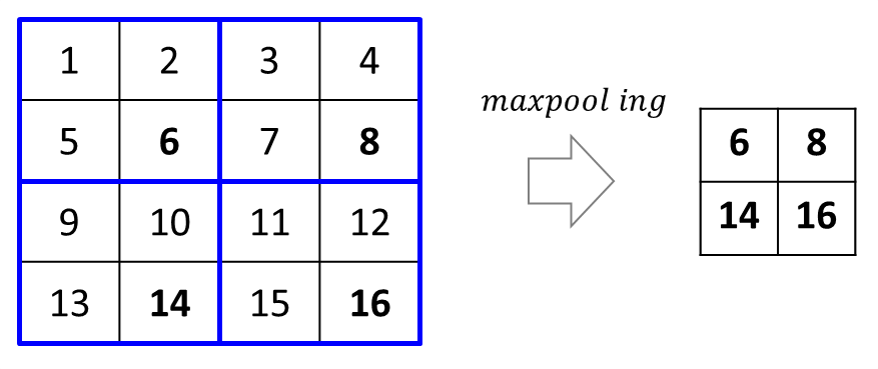

In [9]:
# pooling layer : pooling layer는 parameter(weight)가 필요없기 때문에 통해서 H,W의 크기를 효율적으로 줄일 수 있음
Image.open('./images/img3.png')

In [6]:
# 1D-pooling layer
x = torch.FloatTensor([[-1,1,2,6]])
maxpool = nn.MaxPool1d(kernel_size=2,stride=2)
avgpool = nn.AvgPool1d(kernel_size=2,stride=2)
print(x, maxpool(x), avgpool(x))

tensor([[-1.,  1.,  2.,  6.]]) tensor([[1., 6.]]) tensor([[0., 4.]])


In [17]:
# 2D-pooling layer
imgs = torch.randint(0,5,size=(1,1,4,4)).float()
maxpool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
avgpool = nn.AvgPool2d(kernel_size=(2,2),stride=(2,2))
print('원본 텐서','\n',imgs,'\n')
print('maxpooling :','\n',maxpool(imgs),'\n')
print('avgpooling :','\n',avgpool(imgs),'\n')

원본 텐서 
 tensor([[[[2., 1., 4., 3.],
          [3., 2., 3., 0.],
          [3., 3., 4., 4.],
          [2., 0., 2., 2.]]]]) 

maxpooling : 
 tensor([[[[3., 4.],
          [3., 4.]]]]) 

avgpooling : 
 tensor([[[[2.0000, 2.5000],
          [2.0000, 3.0000]]]]) 



In [8]:
# batchnorm
x = torch.FloatTensor([[1,2,3],
                       [2,2,2],
                       [3,2,1]])
batchnorm = nn.BatchNorm1d(num_features=3)
print(x, '\n', batchnorm(x))

tensor([[1., 2., 3.],
        [2., 2., 2.],
        [3., 2., 1.]]) 
 tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  0.0000, -1.2247]], grad_fn=<NativeBatchNormBackward0>)


In [9]:
# dropout
x = torch.FloatTensor([[1,2,3],
                       [2,2,2],
                       [3,2,1]])
dropout = nn.Dropout(p=0.5)
dropout.train()
print(x, '\n', dropout(x))

tensor([[1., 2., 3.],
        [2., 2., 2.],
        [3., 2., 1.]]) 
 tensor([[2., 4., 6.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [25]:
x = torch.randn(64,3,64,64)

conv_block = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
                           nn.BatchNorm2d(num_features=16),
                           nn.ReLU(inplace=True),
                           # nn.Dropout(p=0.1),
                           nn.MaxPool2d(kernel_size=(3,3),stride=(2,2), padding=(1,1))
)

summary(model=conv_block, input_size=(3,64,64), device='cpu')
print(conv_block(x).shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
       BatchNorm2d-2           [-1, 16, 64, 64]              32
              ReLU-3           [-1, 16, 64, 64]               0
         MaxPool2d-4           [-1, 16, 32, 32]               0
Total params: 480
Trainable params: 480
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 1.62
Params size (MB): 0.00
Estimated Total Size (MB): 1.67
----------------------------------------------------------------
torch.Size([64, 16, 32, 32])


#### Custom model 구축

In [11]:
"""
class CustomModel(torch.nn.Module):
  def __init__(self):
  원하는 nueral networks 모델 구조를 layer 별로 혹은 block화 하여 정의

  def forward(self, x):
  __init__에서 정의한 nueral networks에 모델을 입력하여 예측값을 얻는 forward 과정
"""

'\nclass CustomModel(torch.nn.Module):\n  def __init__(self):\n  원하는 nueral networks 모델 구조를 layer 별로 혹은 block화 하여 정의\n\n  def forward(self, x):\n  __init__에서 정의한 nueral networks에 모델을 입력하여 예측값을 얻는 forward 과정\n'

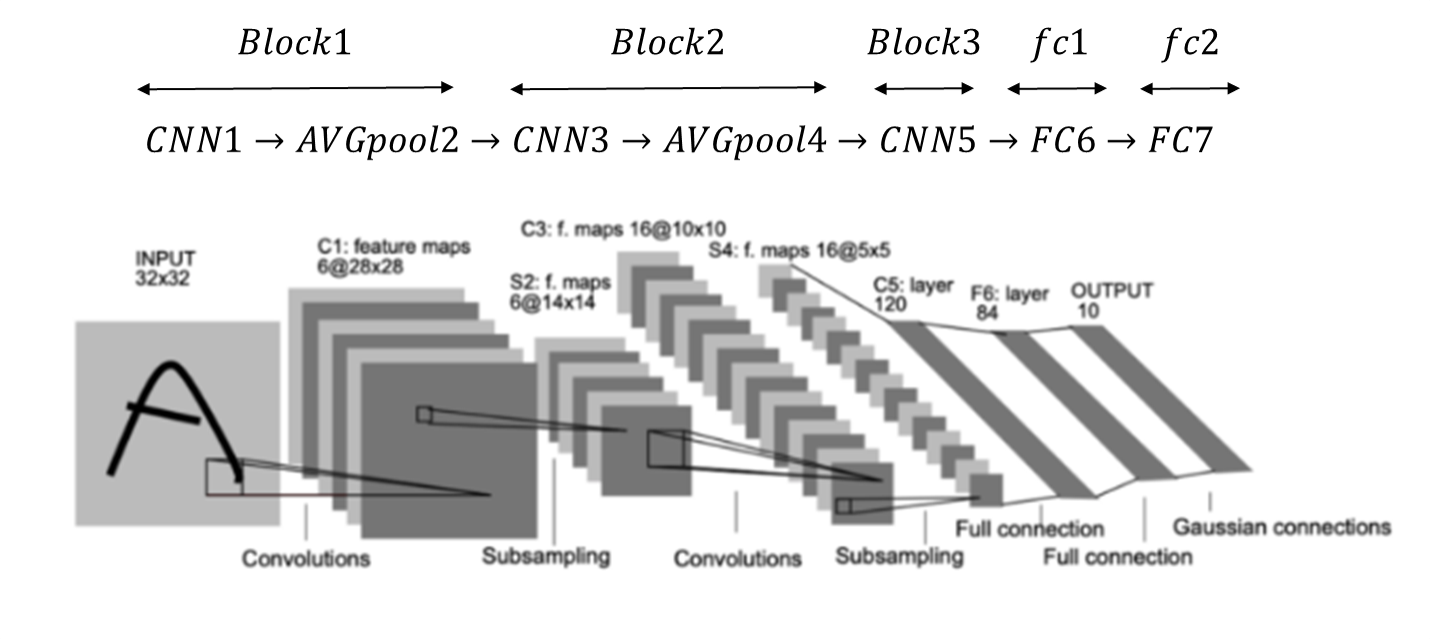

In [19]:
Image.open('./images/img4.png')

In [20]:
class MyLeNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.block1 = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=6,kernel_size=(5,5),stride=(1,1),padding=(0,0)), # C1 layer
                           # nn.BatchNorm2d(num_features=6),
                           nn.Tanh(),
                           # nn.Dropout(p=0.1),
                           nn.AvgPool2d(kernel_size=(2,2),stride=(2,2), padding=(0,0))) # S2 layer
        
        self.block2 = nn.Sequential(nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),stride=(1,1),padding=(0,0)), # C3 layer
                           # nn.BatchNorm2d(num_features=16),
                           nn.Tanh(),
                           # nn.Dropout(p=0.1),
                           nn.AvgPool2d(kernel_size=(2,2),stride=(2,2), padding=(0,0))) # S4 layer
        
        self.block3 = nn.Sequential(nn.Conv2d(in_channels=16,out_channels=120,kernel_size=(5,5),stride=(1,1),padding=(0,0)), # C5 layer
                           nn.Tanh())
        
        self.fc1 = nn.Sequential(nn.Linear(120,84), nn.Tanh())
        self.fc2 = nn.Linear(84,num_classes)
        
        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
        self.init_weights()
        
    def forward(self, x):
        # x : B, 3, 32, 32
        out = self.block1(x) # B, 6, 14, 14
        out = self.block2(out) # B, 16, 5, 5
        out = self.block3(out) # B, 120, 1, 1
        out = self.flatten(out) # B, 120*1*1
        out = self.fc1(out) # B, 84
        out = self.fc2(out) # B, num_classes
        return out
    
    # 모델의 파라미터를 초기화
    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,
                                        mode='fan_out',
                                        nonlinearity='leaky_relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1.0)
                nn.init.constant_(m.bias, 0.0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0.0)

In [24]:
summary(MyLeNet(num_classes=10), input_size=(3,32,32), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
           Flatten-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
---------------------------------

In [26]:
x = torch.randn(size=(64,3,32,32))
lenet = MyLeNet(num_classes=10)

print(x.shape, lenet(x).shape)

torch.Size([64, 3, 32, 32]) torch.Size([64, 10])


#### Save & Load Model Parameters

In [28]:
# save model parameters / torch는 모델 구조 자체를 저장하는 것이 아니고 parameter만 저장
save_path = './results/model_save_ex.pt'

# dictionary로 모델의 parameter뿐만 아니라 다른 정보들(ex. best epoch, best accuracy 등)을 저장
save_dict = {'model_A':lenet.state_dict(),
             #'model_B':lenet.state_dict(),
             #'optimizer':optimizer.load_state_dict(),
             }

torch.save(save_dict, save_path)

In [29]:
# load model parameters / 모델 구조를 불러온 뒤 parameter를 해당 레이어로 load해줘야함
model = MyLeNet() # 모델 구조 선억
load_dict = torch.load(save_path, map_location='cpu')
parameters = load_dict['model_A'] 
model.load_state_dict(parameters,strict=False)

<All keys matched successfully>